In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [25]:
conda install seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Dschy\OneDrive\Desktop\Kaggle-Projects\ufo-sightings-project\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.1.19  |       haa95532_0         122 KB
    seaborn-0.11.1             |     pyhd3eb1b0_0         212 KB
    ------------------------------------------------------------
                                           Total:         334 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.1-pyhd3eb1b0_0

The following packages will be UPDATED:

  ca-certificates                      2020.12.8-haa95532_0 --> 2021.1.19-haa95532_0




ca-certificates-2021 | 122 KB    |            |   0% 
ca-certificates-2021 | 122 KB    | #3         |  13% 
ca-certificates-2021 | 122 KB    | ######

In [26]:
import seaborn as sns

In [2]:
# Import the data
df = pd.read_csv('data/scrubbed.csv')

C:\Users\Dschy\OneDrive\Desktop\Kaggle-Projects\ufo-sightings-project\env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Exporatory Data Analysis

In [4]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [7]:
df.isna().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

# Manipulating Time

In [18]:
df['datetime'] = df['datetime'].str.replace('24:00', '0:00') #converts 24:00 to 0:00
df['month'] = pd.DatetimeIndex(df['datetime']).month #creates column 'month' stripping the year from datetime_zero
df['year'] = pd.DatetimeIndex(df['datetime']).year #creates column 'year' stripping the year from datetime_zero
df['day'] = pd.DatetimeIndex(df['datetime']).day #creates column 'day' stripping the year from datetime_zero
df['hour'] = pd.DatetimeIndex(df['datetime']).hour #creates column 'hour' stripping the year from datetime_zero
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

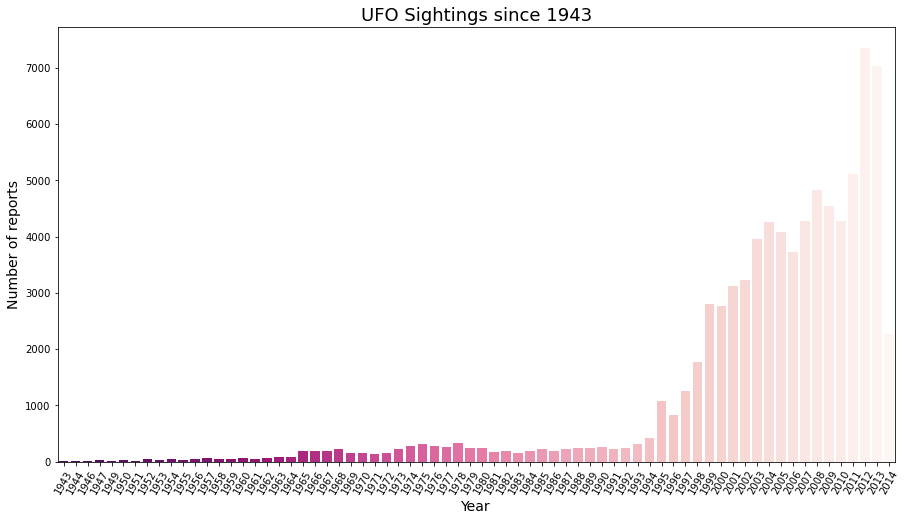

In [27]:
years_data = df['year'].value_counts()
years_index = years_data.index  
years_values = years_data.values
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings since 1943', fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
years_plot = sns.barplot(x=years_index[:70],y=years_values[:70], palette = "RdPu_r")

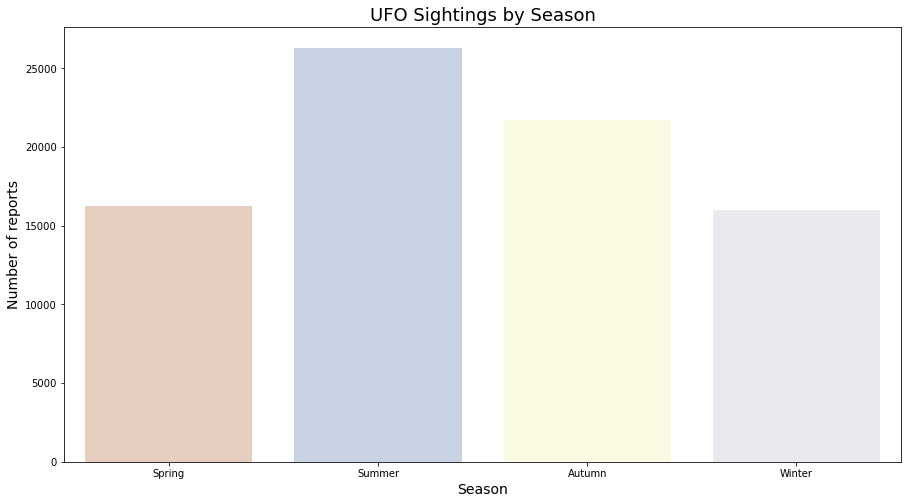

In [28]:
def month_conversion(m):
    if m in range(3,6):
        return "Spring"
    if m in range(6,9):
        return "Summer"
    if m in range(9,12):
        return "Autumn"
    if m == 12 or m == 1 or m == 2:
        return "Winter"
    
season_order = ["Spring", "Summer", "Autumn", "Winter"]
    
df["Season"] = df['month'].apply(month_conversion)
season_stat = df["Season"].value_counts()
season_index = season_stat.index
season_value = season_stat.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by Season', fontsize=18)
plt.xlabel("Season",fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
season_plot = sns.barplot(x=season_index[:60],y=season_value[:60], palette = "Accent_r", alpha=0.3, order=season_order)

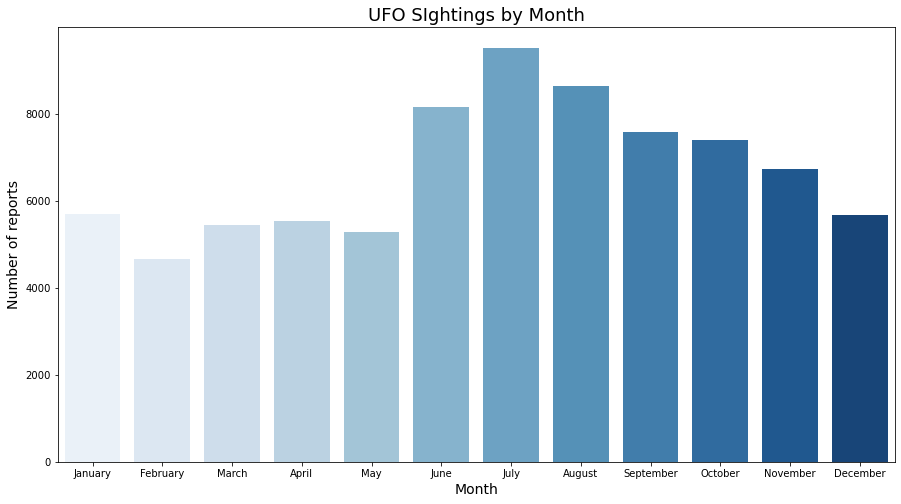

In [30]:
order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df['month'] = df['datetime'].dt.month_name() # turns month numbers into month names
month_data = df['month'].value_counts()
month_index = month_data.index
month_values = month_data.values
plt.figure(figsize=(15,8))
plt.title('UFO SIghtings by Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of reports', fontsize=14)
month_plot = sns.barplot(x=month_index[:60], y=month_values[:60], palette="Blues", order=order)

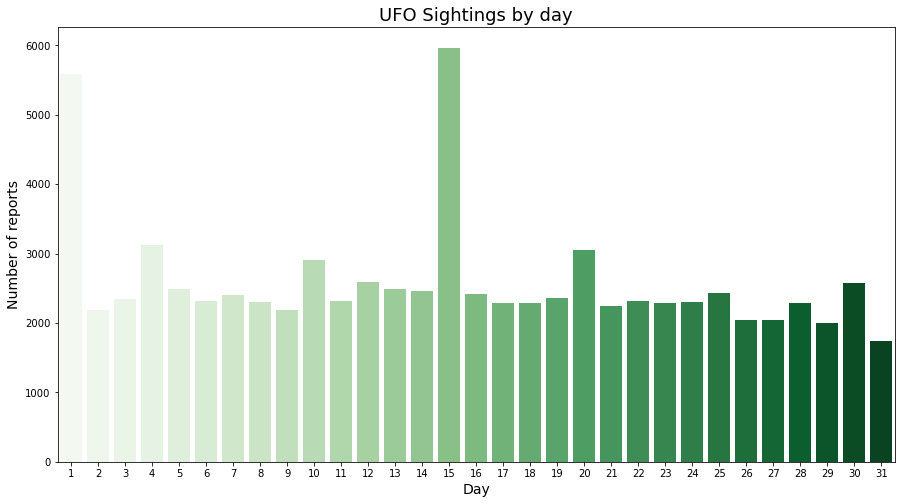

In [33]:
day_data = df['day'].value_counts()
day_index = day_data.index
day_values = day_data.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by day', fontsize=18)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Number of reports', fontsize=14)
month_plot = sns.barplot(x=day_index[:60], y=day_values[:60], palette="Greens")

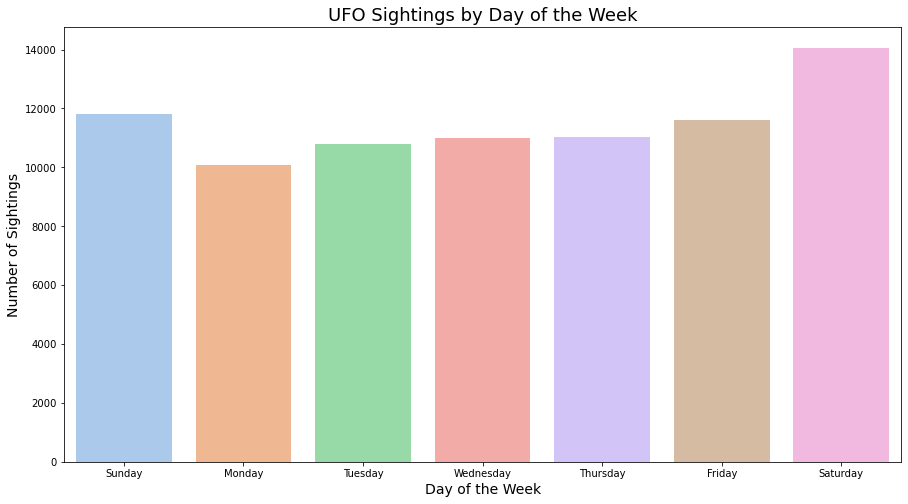

In [34]:
df['weekday'] = df['datetime'].dt.day_name()
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_data = df['weekday'].value_counts()
weekday_index = weekday_data.index
weekday_values = weekday_data.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by Day of the Week', fontsize=18)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Sightings', fontsize=14)
sns.set_palette('pastel')
weekday_plot = sns.barplot(x=weekday_index[:60], y=weekday_values[:60], order = order)

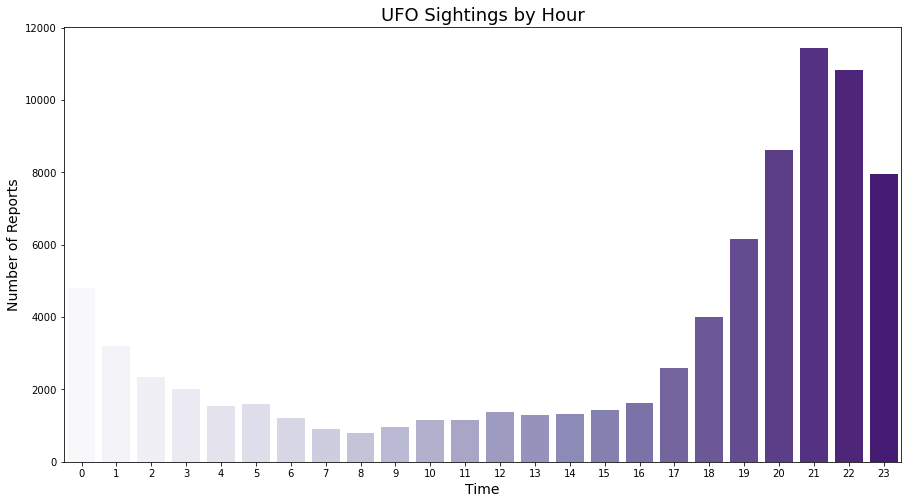

In [51]:
hour_data = df['hour'].value_counts()
hour_index = hour_data.index
hour_values = hour_data.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by Hour', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of Reports', fontsize=14)
hour_plot = sns.barplot(x=hour_index[:60], y=hour_values[:60], palette = 'Purples')

In [53]:
df = df.rename(columns={'longitude ':'longitude'}) #correcting typo in the dataframe
df.at[43782,'latitude']= 33.2001  #correcting another typo
df["latitude"] = df.latitude.astype(float)  #setting latitude as a real number

In [61]:
conda install -c conda-forge basemap

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Dschy\OneDrive\Desktop\Kaggle-Projects\ufo-sightings-project\env

  added / updated specs:
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-1.2.2              |   py38h11503ac_4        15.2 MB  conda-forge
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    certifi-2020.12.5          |   py38haa244fe_1         144 KB  conda-forge
    geos-3.9.0                 |       h39d44d4_0         1.1 MB  conda-forge
    krb5-1.17.2                |       hbae68bd_0         856 KB  conda-forge
    libcurl-7.71.1             |       h4b64cdc_8         278 KB  conda-forge
    libssh2-1.9.0              |       hb06d900_5         218 KB  conda-forge
    openssl-1.1.1i             |       h8ffe710_0         5.8 MB  conda-forge
    proj-7.2.0                 

In [69]:
import os

os.environ['PROJ_LIB'] = r'C:\Users\Dschy\AppData\Local\Continuum\anaconda3\pkgs\proj4-5.1.0-hfa6e2cd_1\Library\share'

from mpl_toolkits.basemap import Basemap

In [68]:
from mpl_toolkits.basemap import Basemap

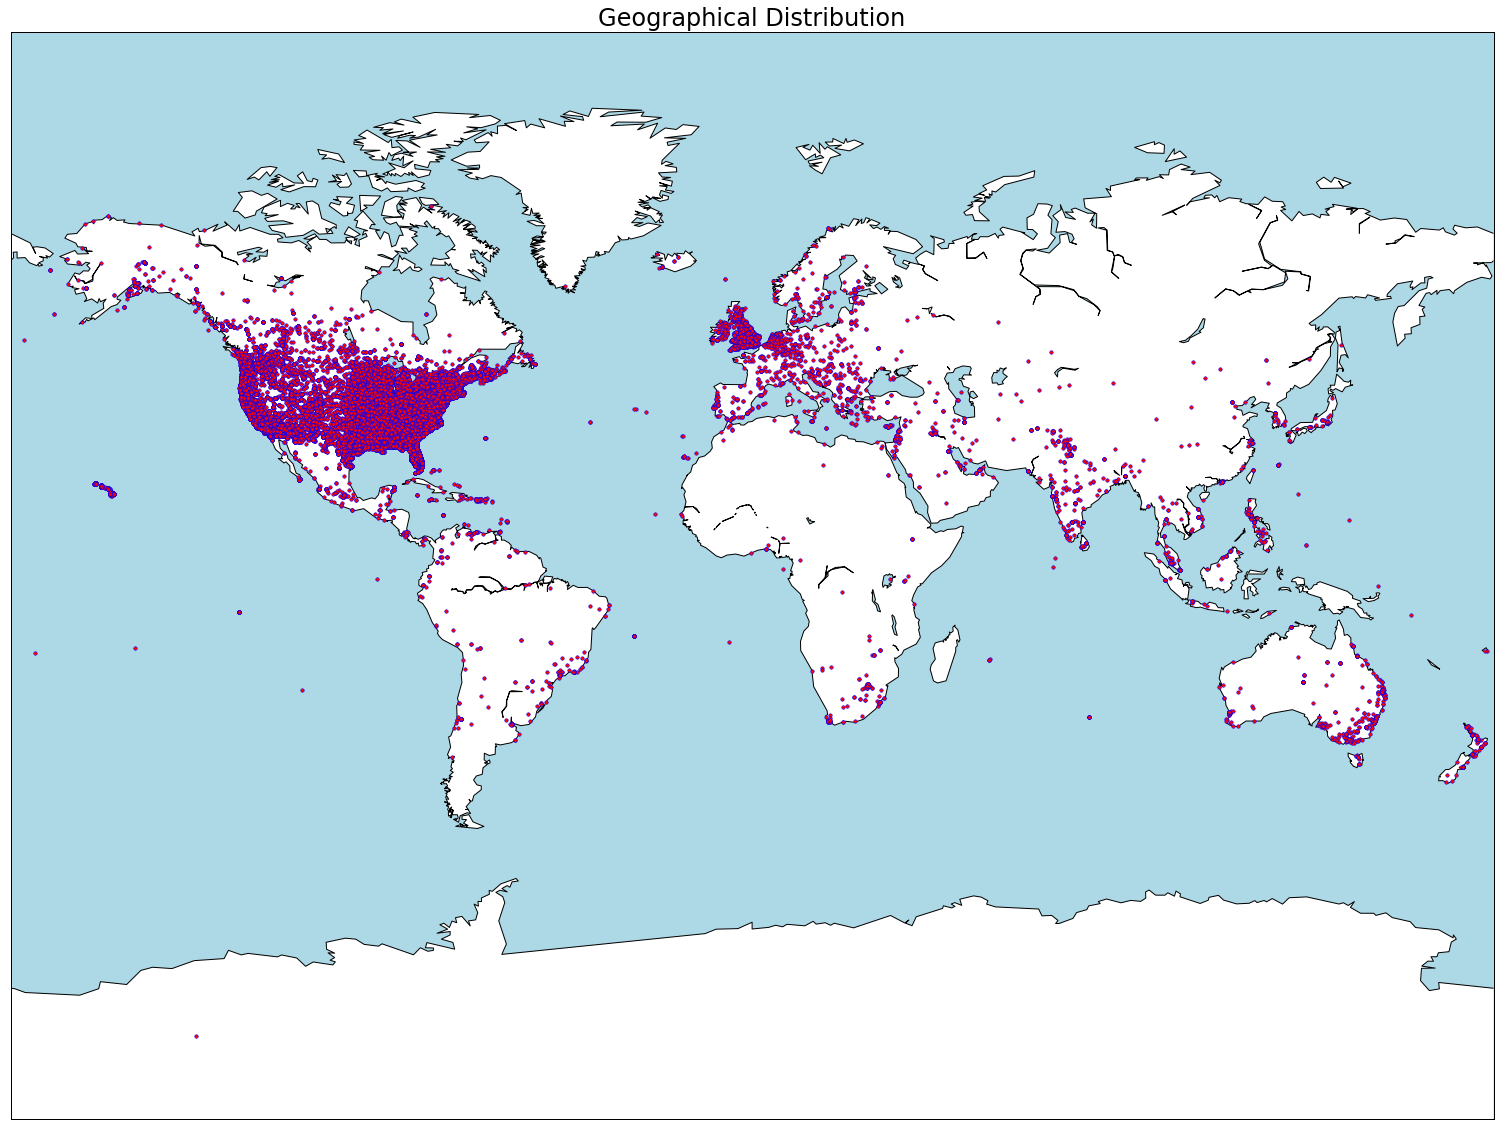

In [70]:
lat = df['latitude'].tolist()
lon = df['longitude'].tolist()

plt.figure(figsize=(30,20))
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=50,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='lightblue', zorder=1)

# draw parallels and meridians.

m.drawmapboundary(fill_color="lightblue")
m.scatter(lon,lat,latlon=True, s=50, c='red', marker='.', alpha=1, edgecolor='b', linewidth=0.5, zorder=10)


plt.title("Geographical Distribution", size=24)
plt.show()

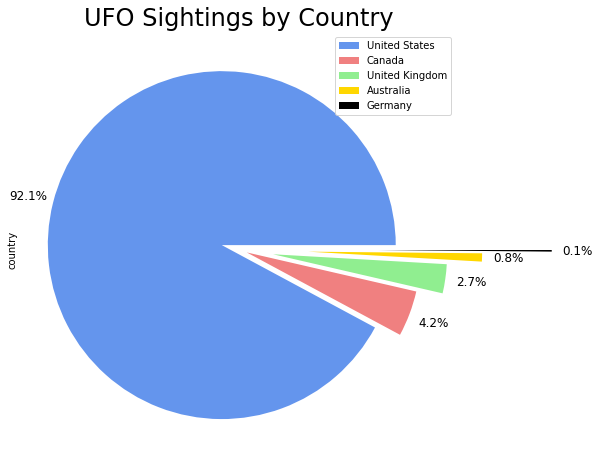

In [74]:
plt.subplots(figsize=(18,8))
expl = (0.1, 0.05, 0.2, 0.4, 0.8)
colors = ['cornflowerblue', 'lightcoral', 'lightgreen', 'gold', 'black']
labels = ['United States', 'Canada', 'United Kingdom', 'Australia', 'Germany']

df['country'].value_counts().plot(kind='pie', fontsize=12, colors=colors,
                                  explode=expl, figsize=(8,8), autopct='%.1f%%',
                            pctdistance=1.15, labels=None)
plt.legend(labels=labels, loc='upper right')
plt.title('UFO Sightings by Country', size=24)

plt.xticks(rotation=45, fontsize=15)
plt.show()

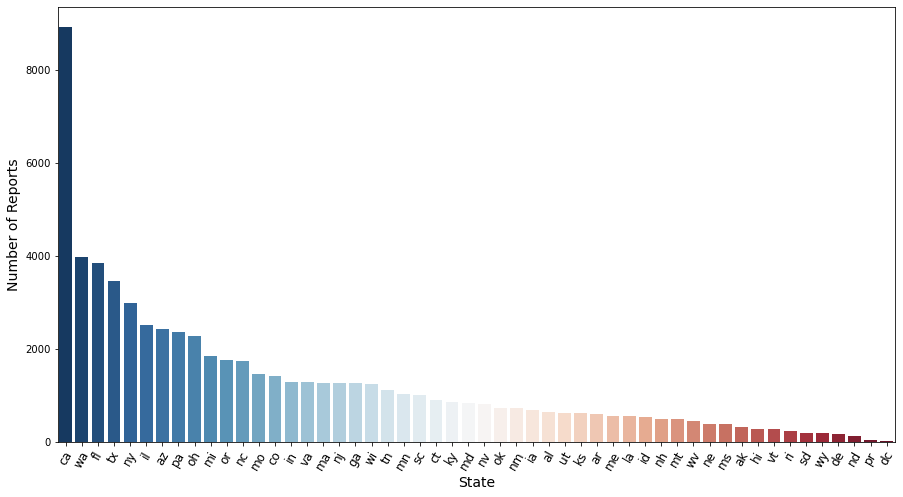

In [76]:
usa_stats = (df['country']=='us')
usdf = df[usa_stats]

state_stats = usdf.state.value_counts()
state_index = state_stats.index
state_values = state_stats.values
plt.figure(figsize=(15,8))
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Reports', fontsize=14)
plt.xticks(rotation = 60, size=12)
state_plot = sns.barplot(x=state_index[:60], y=state_values[:60], palette='RdBu_r')

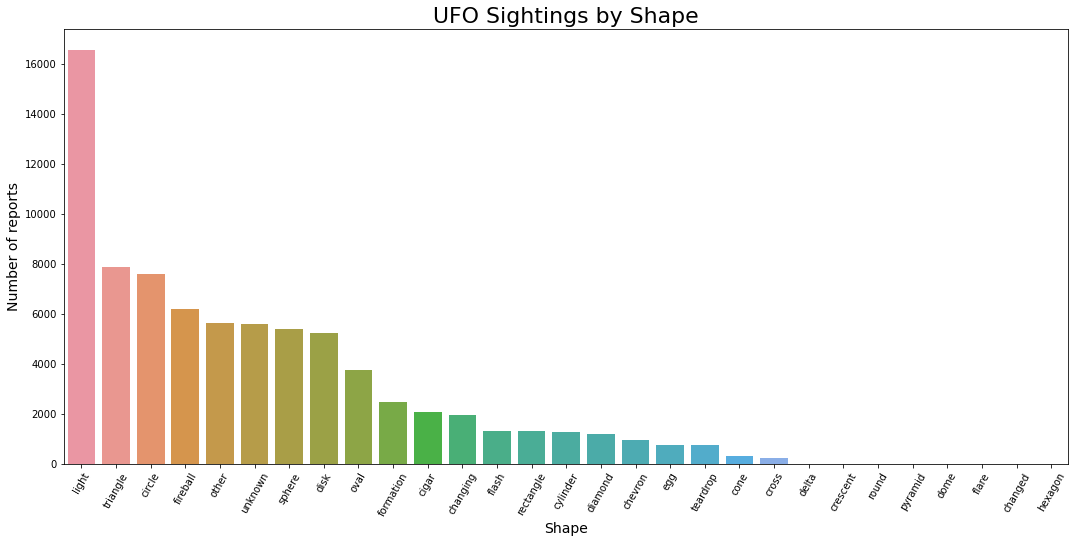

In [78]:
shape = df['shape'].value_counts()
shape_index = shape.index
shape_values = shape.values
plt.figure(figsize=(18,8))
shape = sns.barplot(x=shape_index[:60],y=shape_values[:60])
plt.xticks(rotation = 60)
plt.title("UFO Sightings by Shape", size=22)
plt.xlabel("Shape", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)

#plt.legend(labels=labs, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

C:\Users\Dschy\OneDrive\Desktop\Kaggle-Projects\ufo-sightings-project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


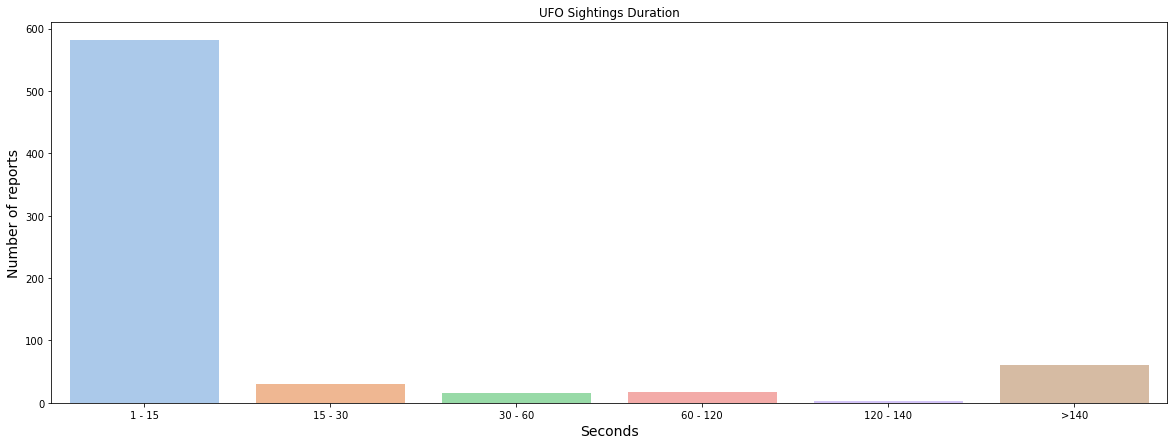

In [79]:
plt.subplots(figsize=(20,7))
duration_seconds = df["duration (seconds)"].value_counts()
dur_order = ["1 - 15","15 - 30", "30 - 60", "60 - 120","120 - 140", ">140" ]
duration_list=[]
for i in duration_seconds:
    if i in range(1,16):
        duration_list.append("1 - 15")
    if i in range(15,31):
        duration_list.append("15 - 30")
    if i in range(30,61):
        duration_list.append("30 - 60")
    if i in range(60,121):
        duration_list.append("60 - 120")
    if i in range(120,141):
        duration_list.append("120 - 140")
    if i > 140:
        duration_list.append(">140")

duration_list = pd.Series(duration_list)
duration_list = duration_list.value_counts()
dura_index = duration_list.index
dura_value = duration_list.values
duration = sns.barplot(dura_index, dura_value, order=dur_order)
plt.xlabel("Seconds", size=14)
plt.ylabel("Number of reports", size=14)
plt.title("UFO Sightings Duration")

plt.show()